**Introduction to recurrent neural network**

Forecasting one step ahead

In [1]:
!pip install tensorflow-gpu==2.1.0

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random

1) Serial data generation

In [0]:
def generate_time_series(batch_size, n_steps):

  freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)

  # Wave 1
  series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))

  # Wave 2
  series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20))

  # Wave 3
  series += 0.01 * np.sin((time - offset2) * (freq2 * 40 + 40))

  # Random noise
  series += 0.1 * np.sin(np.random.rand(batch_size, n_steps) - 0.5)

  return series[..., np.newaxis].astype(np.float32), time

In [4]:
np.random.seed(42)

n_steps = 50
batch_size = 10000
series, time = generate_time_series(batch_size, n_steps + 1)
series.shape

(10000, 51, 1)

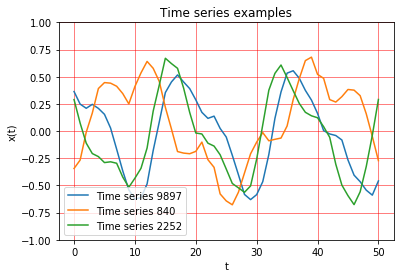

In [5]:
num = np.random.randint(batch_size, size = 3)

for i in num:
  plt.plot(series[i, :, :])
  plt.grid(color='r', linestyle='-', linewidth=0.5)
  plt.ylabel('x(t)')
  plt.xlabel('t')
  axes = plt.gca()
  axes.set_ylim([-1, 1])
  plt.legend(['Time series '+ num[0].astype('str'), 
              'Time series '+ num[1].astype('str'), 
              'Time series '+ num[2].astype('str')])
  plt.title('Time series examples')

2) Dataset partition

In [0]:
# Forecasting a single value 
x_train, y_train = series[:7000, :n_steps], series[:7000, -1]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
x_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [7]:
x_train.shape

(7000, 50, 1)

3) Baseline metrics

In [8]:
# Predict intially a all last series values to get a loss value
y_pred = x_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.0201747

4) Implementing deep RNN

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

deep_rnn = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

deep_rnn.compile(loss="mse", optimizer="adam")
history = deep_rnn.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0434 - val_loss: 0.0073
Epoch 2/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0067 - val_loss: 0.0052
Epoch 3/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0052 - val_loss: 0.0045
Epoch 4/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0046 - val_loss: 0.0045
Epoch 5/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0040 - val_loss: 0.0038
Epoch 6/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0039 - val_loss: 0.0041
Epoch 7/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0038 - val_loss: 0.0033
Epoch 8/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0036 - val_loss: 0.0037
Epoch 9/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0035 - val_loss: 0.0037
Epoch 10/20
7000

5) Model training

In [11]:
deep_rnn.evaluate(x_valid, y_valid)

2000/2000 [==============================] - 0s 243us/sample - loss: 0.0030


0.0030093652941286563

In [16]:
deep_rnn = model
y_pred = deep_rnn.predict(x_valid)
y_pred.shape

(2000, 1)

In [17]:
series = x_valid[1, :, 0]
y= y_valid[1, 0]
y_pred = y_pred[0, 0]

plt.plot(series, ".-")
plt.plot(n_steps, y, "bx", markersize=10)
plt.plot(n_steps, y_pred, "ro")
plt.show()

IndexError: ignored